# Data Analysis of Voting Propositions

## Introduction

This notebook performs data analysis on voting propositions by loading and processing multiple datasets. The aim is to clean, merge, and analyze voting data to identify polarized votes and export the results to a CSV file.

---

## Import Libraries

We start by importing the necessary libraries for data manipulation and visualization.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Adjust default font size for better readability
plt.rcParams.update({'font.size': 12})


## Load Data

We load the CSV data files into pandas DataFrames for analysis.


In [14]:
# Load the CSV data into DataFrames
proposition_microdados = pd.read_csv('..\data\processed\proposicao_microdados.csv')
proposition_tema = pd.read_csv('..\data\processed\proposicao_tema.csv')
voting_object = pd.read_csv('..\data\processed/votacao_objeto.csv')
voting_parliamentar = pd.read_csv('..\data\processed/votacao_parlamentar.csv')
voting = pd.read_csv('..\data\processed/votacao.csv')


e:\Anaconda\envs\camara-analysis_3\lib\site-packages\IPython\core\interactiveshell.py:3508: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Rename Columns

To ensure consistency across the datasets, we rename certain columns.


In [15]:
# Rename columns for consistency
proposition_microdados.rename(columns={'data': 'proposition_date', 'ano': 'proposition_year'}, inplace=True)
voting_object.rename(columns={'data': 'voting_date'}, inplace=True)

## Merge Tables

We join the tables based on the provided keys to consolidate the data.


In [16]:
# Select relevant columns from proposition_microdados
voting_analysis = proposition_microdados[['id_proposicao', 'proposition_year', 'proposition_date', 'sigla', 'tipo']]

# Merge with proposition_tema on 'id_proposicao'
voting_analysis = voting_analysis.merge(proposition_tema[['id_proposicao', 'tema']], on='id_proposicao', how='left')

# Merge with voting_object on 'id_proposicao'
voting_analysis = voting_analysis.merge(voting_object[['id_proposicao', 'id_votacao', 'voting_date']], on='id_proposicao', how='left')

# Merge with voting on 'id_votacao'
voting_analysis = voting_analysis.merge(voting[['id_votacao', 'sigla_orgao', 'aprovacao', 'voto_sim', 'voto_nao', 'voto_outro']], on='id_votacao', how='left')


Let's take a look at the first few rows of the merged table.


In [6]:
# Display the first few rows of the merged DataFrame
voting_analysis.head()

,id_proposicao,proposition_year,proposition_date,sigla,tipo,tema,id_votacao,voting_date,sigla_orgao,aprovacao,voto_sim,voto_nao,voto_outro
0,159771,1961,1961-03-07,INC,Indicação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,162927,1961,1961-03-02,MSC,Mensagem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,164227,1961,1961-08-29,MSC,Mensagem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,162978,1961,1961-03-09,MSC,Mensagem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,163136,1961,1961-09-07,MSC,Mensagem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Visualization

We will now perform some exploratory data analysis through visualizations to understand the distribution and characteristics of the data.

### Number of Propositions per Year

We plot the number of propositions for each year.


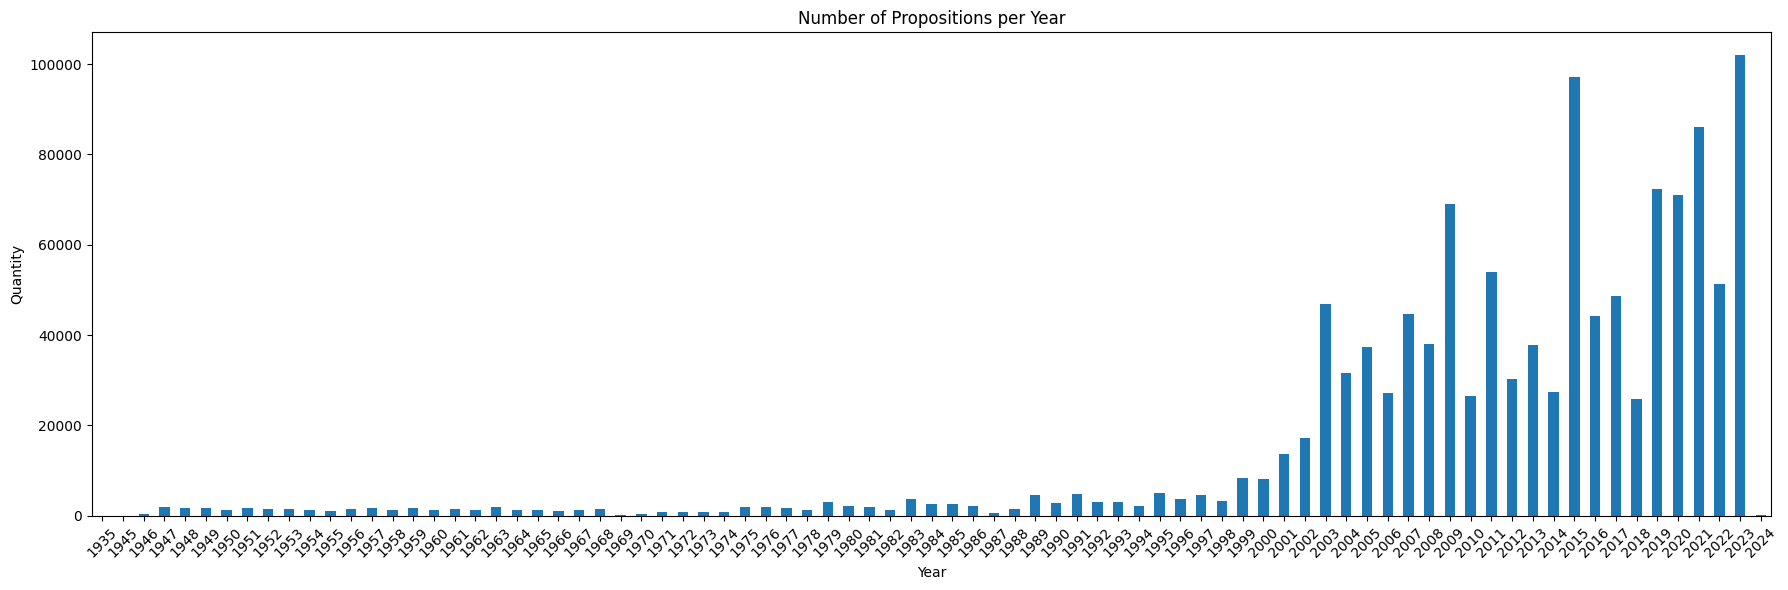

In [11]:
# Plotting the number of propositions per year
plt.figure(figsize=(18, 6))  # Adjust the figure size for better readability
voting_analysis.groupby('proposition_year').size().plot(kind='bar', title='Number of Propositions per Year')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Process Voting Data

We process the voting data by converting date columns, creating new features, and filtering the data.


In [19]:
# Convert 'voting_date' to datetime
voting_analysis['voting_date'] = pd.to_datetime(voting_analysis['voting_date'], errors='coerce')

# Create 'voting_year' by extracting the year from 'voting_date'
voting_analysis['voting_year'] = voting_analysis['voting_date'].dt.year

# Remove nulls and convert 'voting_year' to int
voting_analysis['voting_year'] = voting_analysis['voting_year'].fillna(0).astype(int)

# Calculate total votes
voting_analysis['total_votes'] = voting_analysis['voto_sim'] + voting_analysis['voto_nao'] + voting_analysis['voto_outro']

# Filter votes with more than 200 total votes
voting_analysis = voting_analysis[voting_analysis['total_votes'] > 200]

# Filter for 'PLEN' or 'PLENARIO' in 'sigla_orgao'
voting_analysis = voting_analysis[voting_analysis['sigla_orgao'].isin(['PLEN', 'PLENARIO'])]

### Number of Votes per Year

We plot the number of votes for each year.


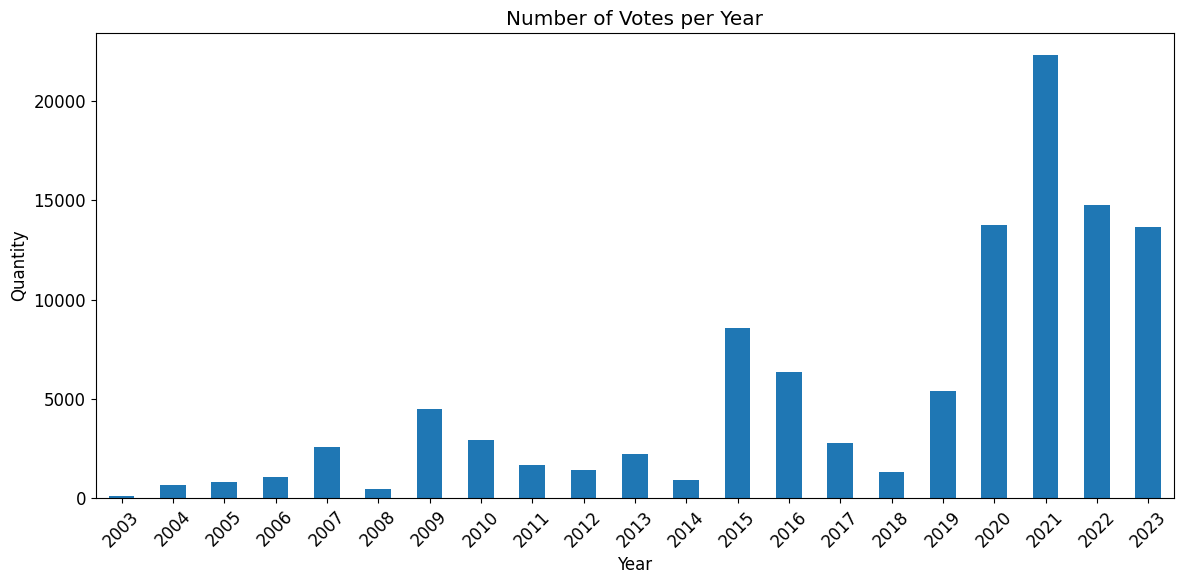

In [20]:
# Plotting the number of votes per year
plt.figure(figsize=(12, 6))
voting_analysis.groupby('voting_year').size().plot(kind='bar', title='Number of Votes per Year')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Top 10 Proposition Types by Quantity

We focus on the top 10 most frequent proposition types.


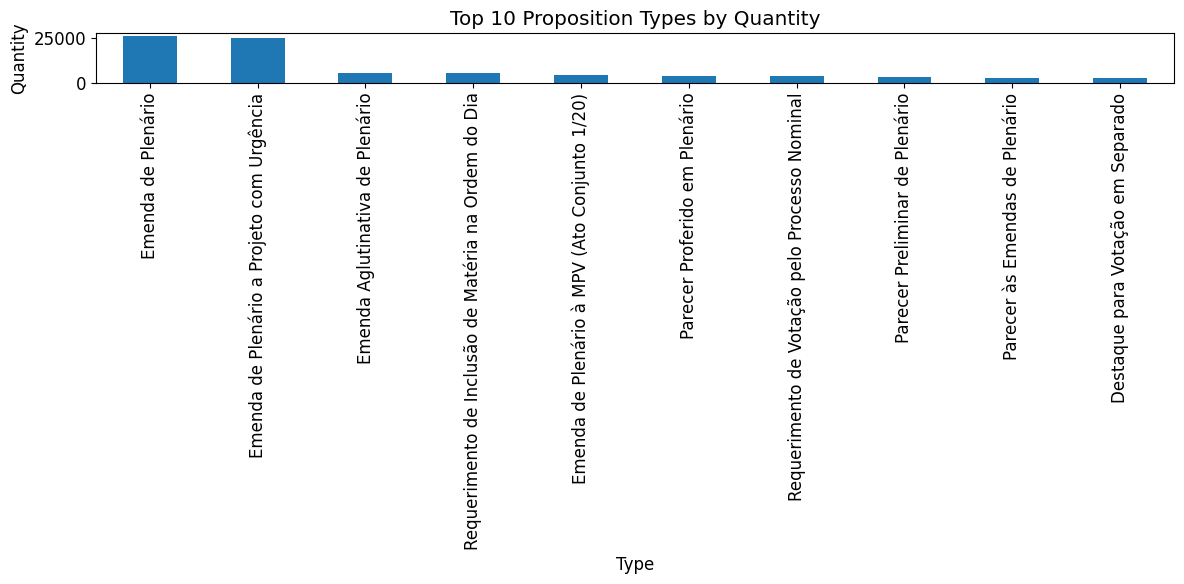

In [23]:
# Filtering the top 10 most frequent types
top_10_types = voting_analysis['tipo'].value_counts().nlargest(10)

# Plotting the graph with only the top 10
plt.figure(figsize=(12, 6))
top_10_types.plot(kind='bar', title='Top 10 Proposition Types by Quantity')
plt.xlabel('Type')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Number of Propositions by Theme

We analyze the distribution of propositions by theme.


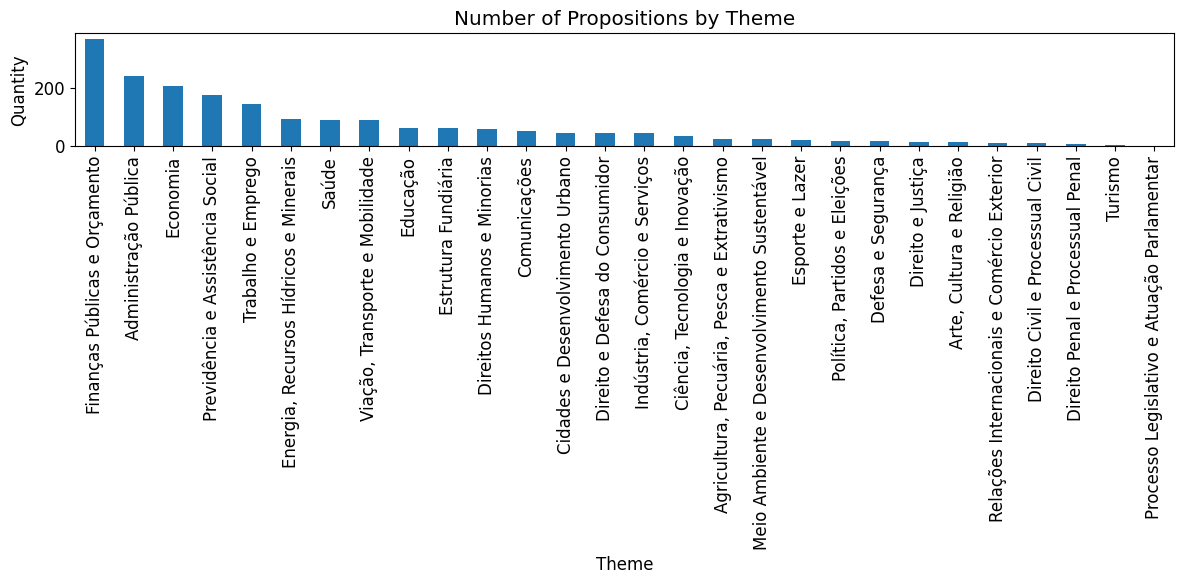

In [25]:
# Plotting the number of propositions by theme
plt.figure(figsize=(12, 6))
voting_analysis['tema'].value_counts().plot(kind='bar', title='Number of Propositions by Theme')
plt.xlabel('Theme')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Approved vs Rejected Propositions

We visualize the count of approved and rejected propositions.


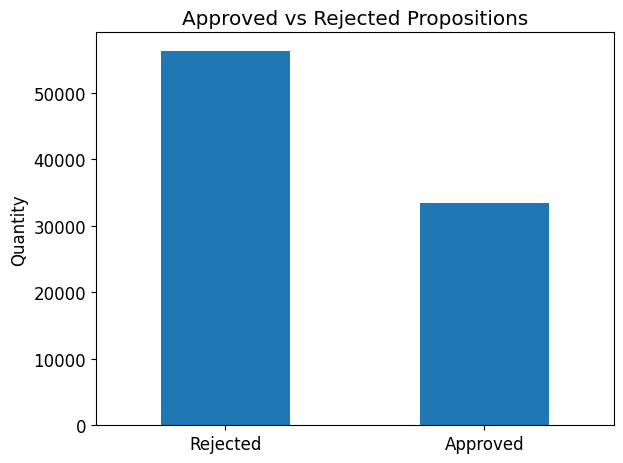

In [26]:
# Mapping 0 and 1 to 'Rejected' and 'Approved'
mapping = {0: 'Rejected', 1: 'Approved'}

# Plotting the graph with new labels and X-axis adjustments
ax = voting_analysis['aprovacao'].map(mapping).value_counts().plot(kind='bar', title='Approved vs Rejected Propositions')
plt.xlabel('')  # Remove X-axis label
plt.ylabel('Quantity')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # Set labels horizontal
plt.tight_layout()
plt.show()


## Evaluate Approval

We replace NaN values in the 'aprovacao' column based on the comparison of 'voto_sim' and 'voto_nao'.


In [29]:
def evaluate_approval(row):
    """Replace NaN values in 'aprovacao' column based on 'voto_sim' and 'voto_nao' comparison."""
    if pd.isna(row['aprovacao']):  # If 'aprovacao' is NaN
        if row['voto_nao'] > row['voto_sim']:
            return 0  # Rejected
        else:
            return 1  # Approved
    else:
        return row['aprovacao']  # Keep the existing value if not NaN


## Apply Approval Evaluation and Calculate Percentages

We apply the approval evaluation function and calculate vote percentages.


In [30]:
# Apply the function to replace NaN values in the 'aprovacao' column
voting_analysis['aprovacao'] = voting_analysis.apply(evaluate_approval, axis=1)

# Calculate the percentage of 'voto_sim'
voting_analysis['yes_vote_percentage'] = voting_analysis['voto_sim'] / voting_analysis['total_votes']


## Filter Polarized Votes

We filter votes where the 'yes' vote percentage is between 40% and 60%, indicating polarized votes.


In [31]:
# Filter polarized votes where 'yes_vote_percentage' is between 40% and 60%
polarized_votes = voting_analysis[(voting_analysis['yes_vote_percentage'] >= 0.4) & 
                                  (voting_analysis['yes_vote_percentage'] <= 0.6)]

### Percentage of Yes Votes by Theme

We compute and plot the average percentage of 'Yes' votes for each theme.


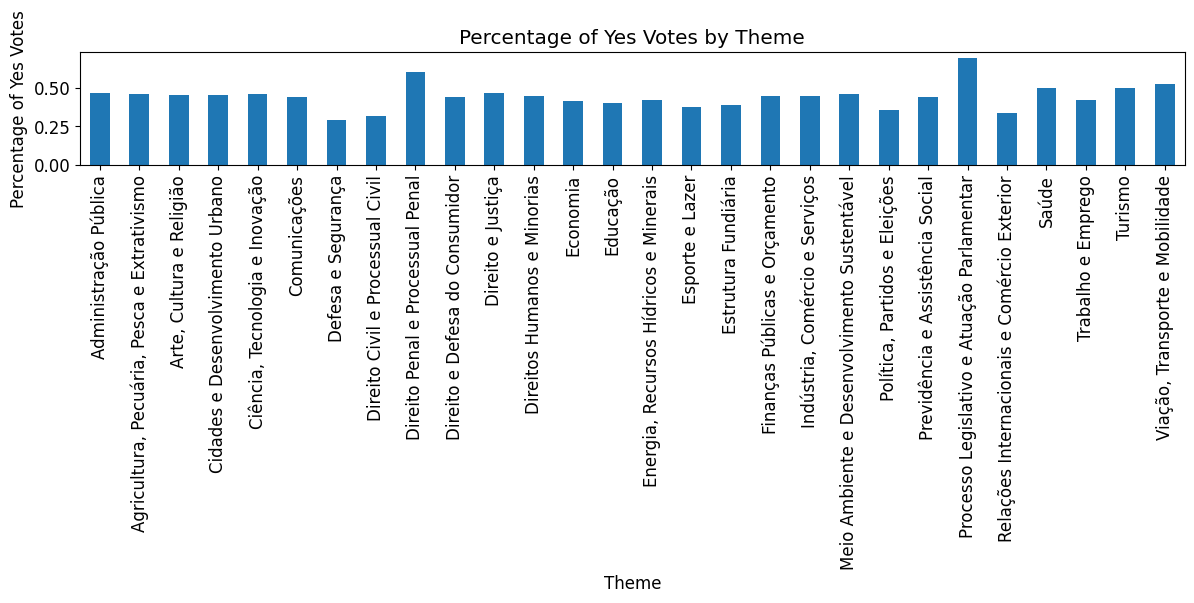

In [33]:
# Plotting the percentage of 'Yes' votes by theme
plt.figure(figsize=(12, 6))
voting_analysis.groupby('tema')['yes_vote_percentage'].mean().plot(kind='bar', title='Percentage of Yes Votes by Theme')
plt.xlabel('Theme')
plt.ylabel('Percentage of Yes Votes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Percentage of Yes Votes by Approval

We analyze how the percentage of 'Yes' votes varies with approval status.


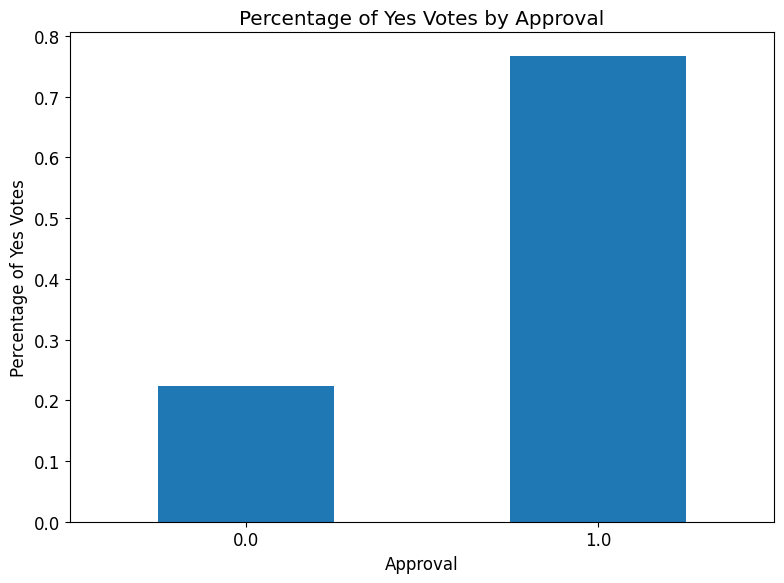

In [34]:
# Plotting the percentage of 'Yes' votes by approval status
plt.figure(figsize=(8, 6))
voting_analysis.groupby('aprovacao')['yes_vote_percentage'].mean().plot(kind='bar', title='Percentage of Yes Votes by Approval')
plt.xlabel('Approval')
plt.ylabel('Percentage of Yes Votes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Distribution of Yes Vote Percentages

We create intervals for the percentage of 'Yes' votes and visualize their distribution.


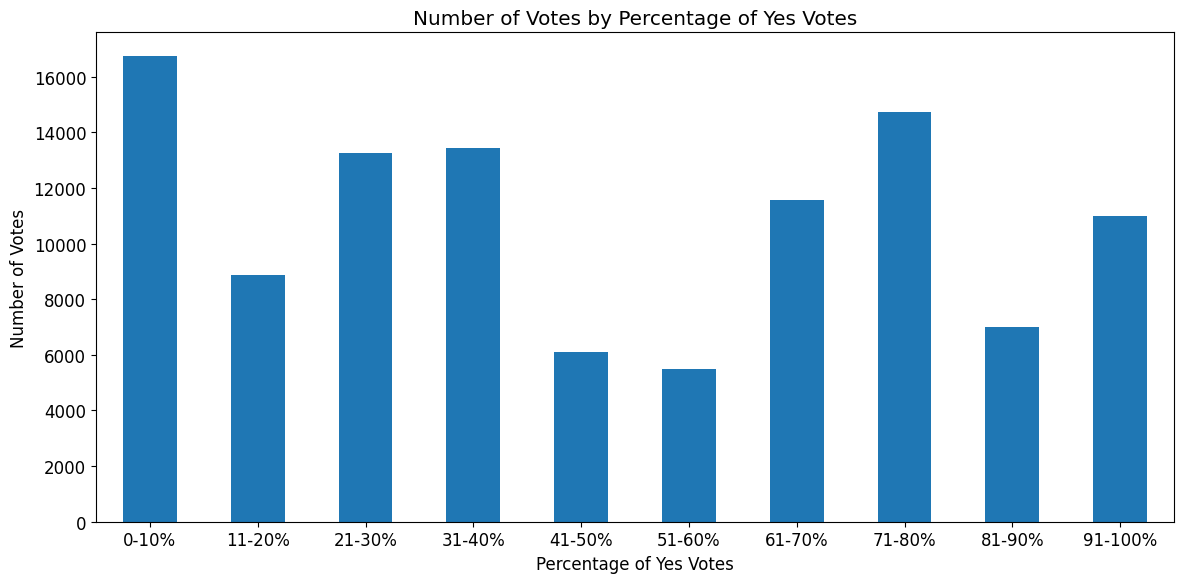

In [36]:
# Creating a new column for intervals of yes_vote_percentage
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-60%', '61-70%', '71-80%', '81-90%', '91-100%']
voting_analysis['yes_vote_percentage_interval'] = pd.cut(voting_analysis['yes_vote_percentage']*100, bins=bins, labels=labels, include_lowest=True)

# Count the number of votes in each interval
plt.figure(figsize=(12, 6))
voting_analysis['yes_vote_percentage_interval'].value_counts(sort=False).plot(kind='bar', title='Number of Votes by Percentage of Yes Votes')
plt.xlabel('Percentage of Yes Votes')
plt.ylabel('Number of Votes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Standard Deviation of Yes Vote Percentages

We calculate the standard deviation of the percentages of 'Yes' votes.


In [37]:
# Calculating the standard deviation of percentages of "yes" votes
std_dev_yes_votes = voting_analysis['yes_vote_percentage'].std()

print(f"Standard Deviation of Yes Vote Percentages: {std_dev_yes_votes:.2f}")


Standard Deviation of Yes Vote Percentages: 0.31


### Polarization Index

We calculate the proportion of votes with extreme polarization (very close to 0% or 100%).


In [38]:
# Calculating the proportion of votes with extreme polarization
extreme_votes = voting_analysis[(voting_analysis['yes_vote_percentage'] <= 0.3) | (voting_analysis['yes_vote_percentage'] >= 0.7)]
polarization_index = len(extreme_votes) / len(voting_analysis)

print(f"Polarization Index (Proportion of votes at extremes): {polarization_index:.2%}")


Polarization Index (Proportion of votes at extremes): 66.25%


### Standard Deviation Over the Years

We analyze how the standard deviation of 'Yes' vote percentages changes over the years.


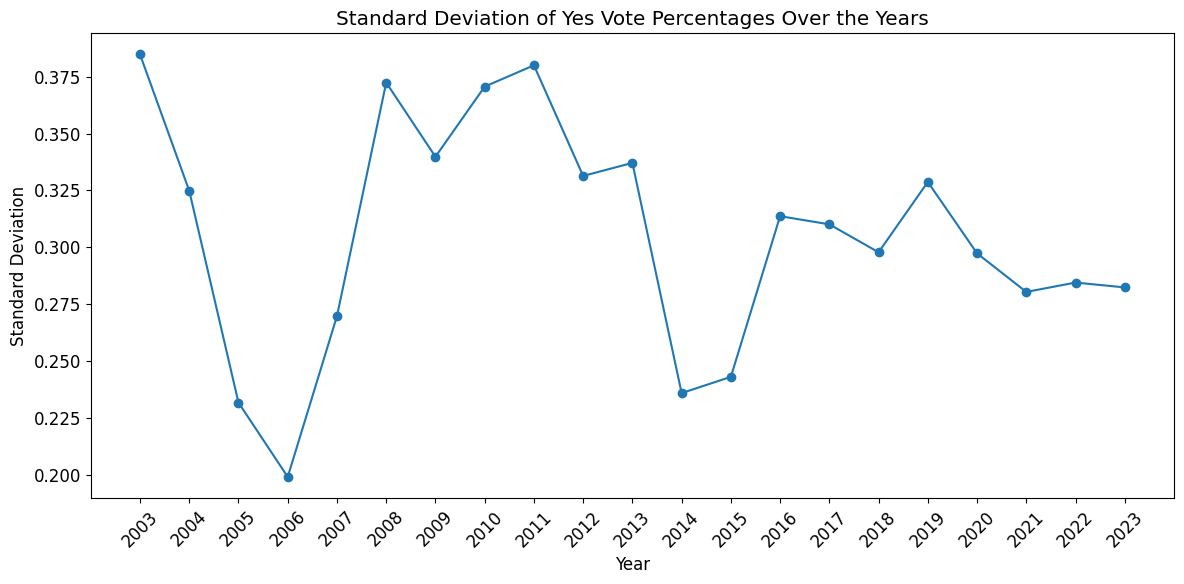

In [39]:
# Group by year and calculate the standard deviation of yes vote percentages
std_dev_by_year = voting_analysis.groupby('voting_year')['yes_vote_percentage'].std()

# Plot the standard deviation over the years with x-axis label adjustments
plt.figure(figsize=(12, 6))
std_dev_by_year.plot(kind='line', marker='o', title='Standard Deviation of Yes Vote Percentages Over the Years')
plt.xlabel('Year')
plt.ylabel('Standard Deviation')
plt.xticks(ticks=std_dev_by_year.index, labels=std_dev_by_year.index.astype(int), rotation=45)
plt.tight_layout()
plt.show()


### Polarization Index Over the Years

We compute the polarization index for each year.


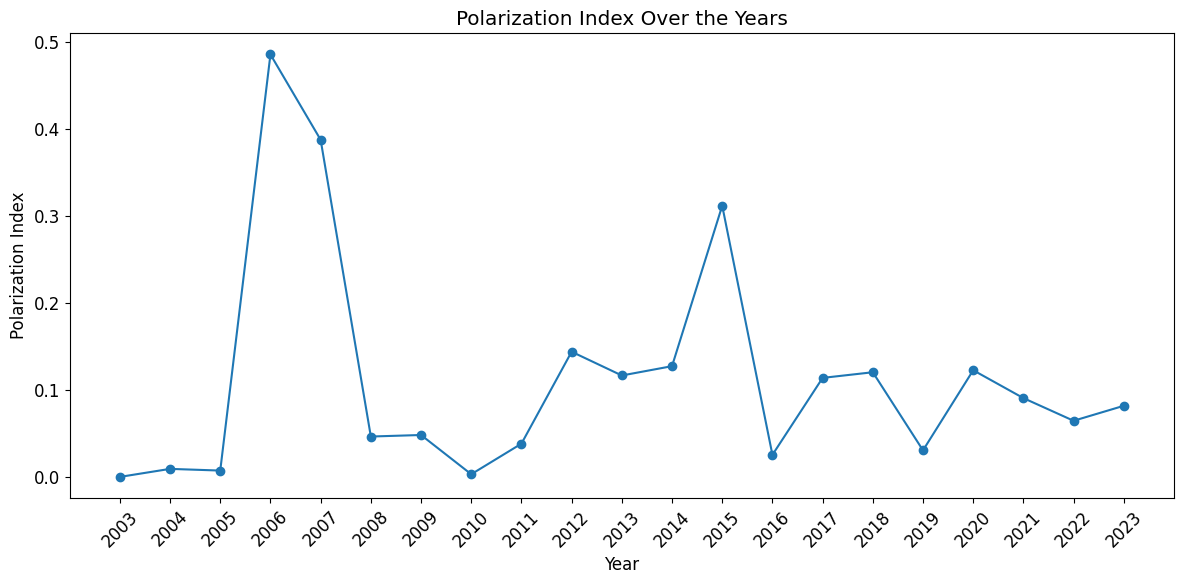

In [40]:
# Defining a function to calculate the polarization index
def calculate_polarization_index(group):
    polarized_votes = group[(group['yes_vote_percentage'] >= 0.4) & (group['yes_vote_percentage'] <= 0.6)]
    return len(polarized_votes) / len(group)

# Applying the function for each year
polarization_index_by_year = voting_analysis.groupby('voting_year').apply(calculate_polarization_index)

# Plot the polarization index over the years with x-axis label adjustments
plt.figure(figsize=(12, 6))
polarization_index_by_year.plot(kind='line', marker='o', title='Polarization Index Over the Years')
plt.xlabel('Year')
plt.ylabel('Polarization Index')
plt.xticks(ticks=polarization_index_by_year.index, labels=polarization_index_by_year.index.astype(int), rotation=45)
plt.tight_layout()
plt.show()


### Polarization Index by Theme

We compute the polarization index for each theme.


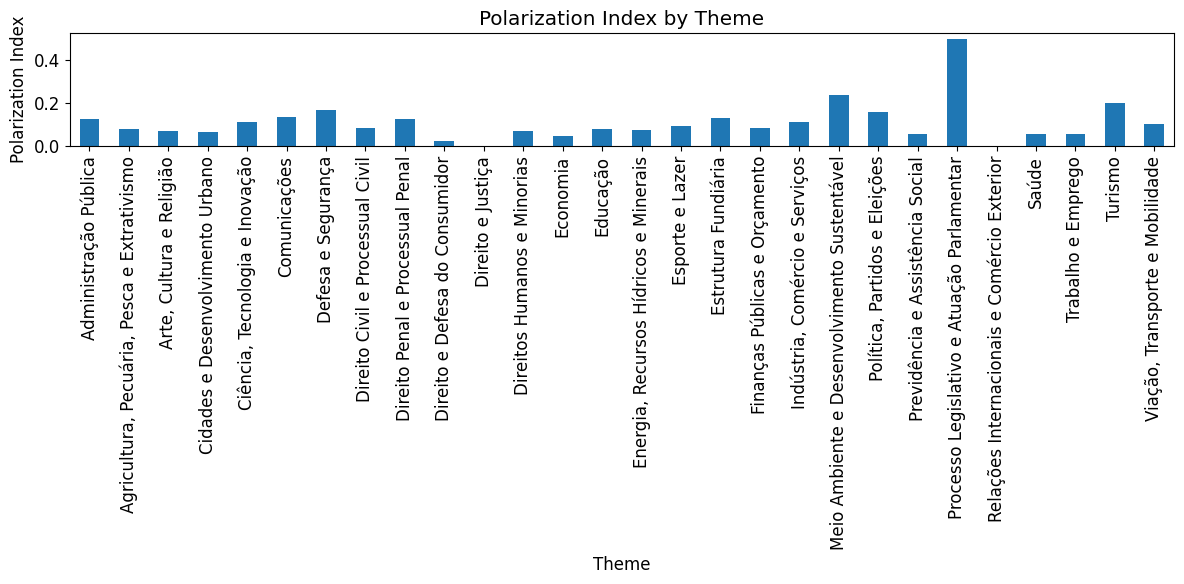

In [42]:
# Applying the function for each theme
polarization_index_by_theme = voting_analysis.groupby('tema').apply(calculate_polarization_index)

# Plotting the polarization index by theme
plt.figure(figsize=(12, 6))
polarization_index_by_theme.plot(kind='bar', title='Polarization Index by Theme')
plt.xlabel('Theme')
plt.ylabel('Polarization Index')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Polarization Index by Proposition Type

We analyze the polarization index and number of votes for the top 10 proposition types.


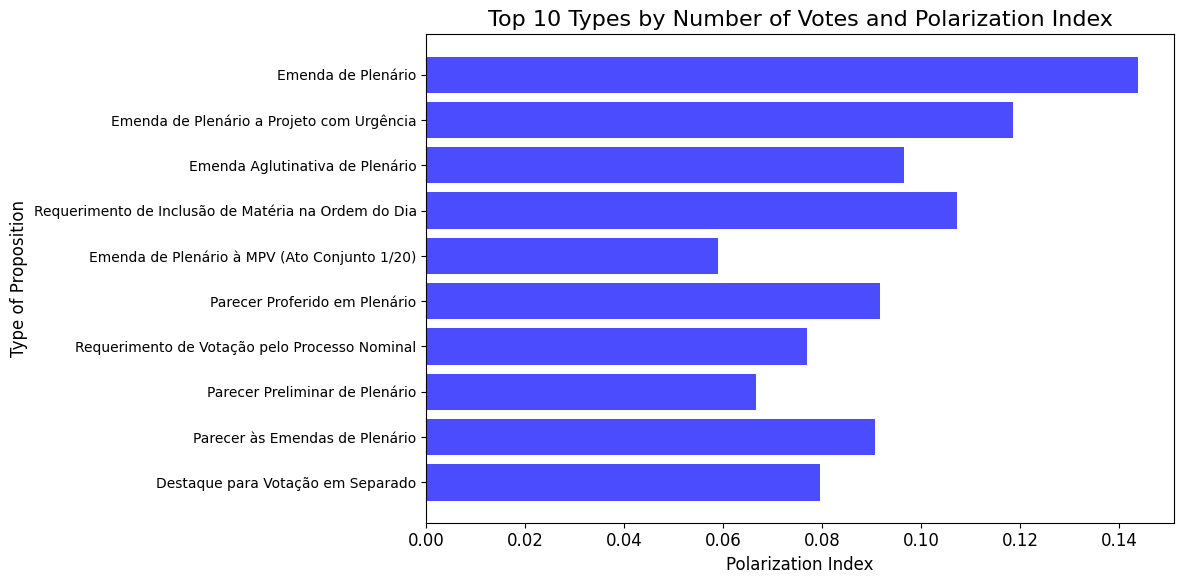

In [43]:
# Group data by type to calculate polarization index and number of votes
polarization_index_by_type = voting_analysis.groupby('tipo').apply(calculate_polarization_index)
number_of_votes_by_type = voting_analysis.groupby('tipo').size()

# Create a DataFrame with the polarization index and number of votes
polarization_by_type = pd.DataFrame({
    'Type': polarization_index_by_type.index,
    'Polarization Index': polarization_index_by_type.values,
    'Number of Votes': number_of_votes_by_type.values
}).dropna()

# Select the Top 10 types with the highest number of votes
top_10_types = polarization_by_type.nlargest(10, 'Number of Votes')

# Plot the graph
plt.figure(figsize=(12, 6))
plt.barh(top_10_types['Type'], top_10_types['Polarization Index'], color='blue', alpha=0.7)

# Title and axis labels
plt.title('Top 10 Types by Number of Votes and Polarization Index', fontsize=16)
plt.xlabel('Polarization Index', fontsize=12)
plt.ylabel('Type of Proposition', fontsize=12)

# Adjust y-axis labels for better readability
plt.yticks(fontsize=10)

# Display the graph
plt.tight_layout()
plt.gca().invert_yaxis()  # Invert Y-axis so that Top 1 is at the top
plt.show()


## Export to CSV

We export the filtered polarized votes to a CSV file.


In [44]:
# Export the DataFrame to a CSV file
polarized_votes.to_csv('../data/polarized_votes.csv', index=False)
print("File '../data/polarized_votes.csv' successfully exported!")


File '../data/polarized_votes.csv' successfully exported!
